## **Reading the data**

In [5]:
import pandas as pd
train = pd.read_csv('/content/data/train.csv')
train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [6]:
# Firstly, we fill all the null spaces with a space
train = train.fillna(' ')
train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


We can see that the features ‘title’, ‘author’ and ‘text’ are important and all are in text form. So, we can combine these features to make one final feature which we will use to train the model and we will call the feature as ‘total’.

In [7]:
train['total'] = train['title'] + ' ' + train['author'] + ' ' + train['text']
train

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."


## **Pre-processing / Cleaning the Data**

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

For preprocessing the data, we need these libraries.

**Stopwords**: Stop words are those common words that appear in a text many times and do not contribute to machine’s understanding of the text.
We don’t want these words to appear in our data. So, we remove these words. All these stopwords are stored in the ntlk library in different languages.

In [9]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Tokenization**: Word tokenization is the process of splitting a large sample of text into words.

**Lemmatization**: Lemmatization is the process of grouping together the different inflected forms of same root word so they can be analysed as a single item.

In [10]:
lemmatizer = WordNetLemmatizer()

The code below is for lemmatization for our train data which excludes stopwords at the same time.

In [11]:
import re
nltk.download('punkt')
nltk.download('wordnet')
for index,row in train.iterrows():
  filter_sentence=' '
  sentence = row['total']
 # Cleaning the sentence with regex
sentence = re.sub(r'[^\w\s]', '', sentence)
 # Tokenization
words = nltk.word_tokenize(sentence)
# Stopwords removal
words = [w for w in words if not w in stop_words]
# Lemmatization
for words in words:
  filter_sentence = filter_sentence  + ' ' + str(lemmatizer.lemmatize(words)).lower()
train.loc[index, 'total'] = filter_sentence
train = train[['total', 'label']]
train

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,total,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired Consortiumne...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",0
20797,Macy’s Is Said to Receive Takeover Approach by...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [12]:
X_train = train['total']
Y_train = train['label']

Finally, we have pre-processed the data but it is still in text form and we can’t provide this as an input to our machine learning model. We need numbers for that so we will use Vectorizers.

## **Vectorizer**

For converting this text data into numerical data, we will use two vectorizers.

**Count** **Vectorizer**

In order to use textual data for predictive modelling, the text must be parsed to remove certain words — this process is called tokenization. These words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization).

**TF-IDF** **Vectorizer**

TF-IDF stands for Term Frequency — Inverse Document Frequency. It is one of the most important techniques used for information retrieval to represent how important a specific word or phrase is to a given document.

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

The code written above will provide a matrix representing your text. It will be a sparse matrix with a large number of elements in Compressed Sparse Row format.

## **Modelling**

Now, we have to decide which classification model will be the best. First, we will split the data and then train the model to predict how accurate our model is.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

**Logistic** **Regression**

In [15]:
%%time
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Accuracy_1 = logreg.score(X_test, y_test)
print(Accuracy_1)

0.9526923076923077
CPU times: user 5.9 s, sys: 6.57 s, total: 12.5 s
Wall time: 6.4 s


**Naive Bayes**

In [17]:
%%time
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)
Accuracy_2 = NB.score(X_test, y_test)
print(Accuracy_2)

0.835
CPU times: user 79 ms, sys: 0 ns, total: 79 ms
Wall time: 82 ms


**Decision Tree Classifier**

In [18]:
%%time
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
Accuracy_3 = clf.score(X_test, y_test)
print(Accuracy_3)

0.9605769230769231
CPU times: user 33.4 s, sys: 27.6 ms, total: 33.4 s
Wall time: 33.6 s


**KNeighborsClassifier**

In [20]:
%%time
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train,y_train)
Accuracy_4 = kn.score(X_test, y_test)
print(Accuracy_4)

0.8115384615384615
CPU times: user 15.3 s, sys: 464 ms, total: 15.8 s
Wall time: 15.8 s


**SGDClassifier**

In [21]:
%%time
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
Accuracy_5 = sgd.score(X_test, y_test)
print(Accuracy_5)

0.9728846153846153
CPU times: user 344 ms, sys: 116 ms, total: 460 ms
Wall time: 330 ms


**RandomForestClassifier**

In [22]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
Accuracy_6 = rfc.score(X_test, y_test)
print(Accuracy_6)

0.9348076923076923
CPU times: user 1min 3s, sys: 39.9 ms, total: 1min 3s
Wall time: 1min 3s


**Support vector machine**

In [23]:
%%time
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='linear',random_state=123)
svc.fit(X_train,y_train)
Accuracy_7 = rfc.score(X_test, y_test)
print(Accuracy_7)

0.9348076923076923
CPU times: user 5min 15s, sys: 140 ms, total: 5min 15s
Wall time: 5min 16s


## **Plotting different Model vs their** **Accuracy**

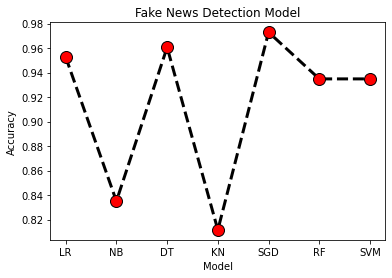

In [24]:
import matplotlib.pyplot as plt
# x axis values 
x = ['LR','NB','DT','KN','SGD','RF','SVM']
# corresponding y axis values 
y = [Accuracy_1,Accuracy_2,Accuracy_3,Accuracy_4,Accuracy_5,Accuracy_6,Accuracy_7] 
# plotting a graph 
plt.plot(x, y, color='black', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='red', markersize=12,) 
# naming the x-axis 
plt.xlabel('Model') 
# naming the y-axis 
plt.ylabel('Accuracy') 
# plot title 
plt.title('Fake News Detection Model') 
# function to show the plot 
plt.show()

## **Result**

In [25]:
best = max(Accuracy_1,Accuracy_2,Accuracy_3,Accuracy_4,Accuracy_5,Accuracy_6,Accuracy_7) 
for i in y:
  if i == best:
    z= y.index(i)
    break
print("The best model, we can use here is: ",x[z])
print("It's accuracy is : ", i)

The best model, we can use here is:  SGD
It's accuracy is :  0.9728846153846153
